In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from wordcloud import WordCloud
%matplotlib inline

In [3]:
fake=pd.read_csv('Fake.csv')

In [4]:
fake

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

In [4]:
true=pd.read_csv('True.csv')

In [5]:
true

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [4]:
fake.isnull()

title   text  subject   date
0      False  False    False  False
1      False  False    False  False
2      False  False    False  False
3      False  False    False  False
4      False  False    False  False
...      ...    ...      ...    ...
23476  False  False    False  False
23477  False  False    False  False
23478  False  False    False  False
23479  False  False    False  False
23480  False  False    False  False

[23481 rows x 4 columns]

In [5]:
grouped=fake.groupby('subject')#['title']

In [6]:
for key, value in grouped:
    print(key, value)


Government News                                                    title  \
15891  TOP FIVE Food Stamp Fraud Takedowns of 2017…Do...   
15892  HOUSE INTEL Slaps Subpoenas on McCain Institut...   
15893  PRICELESS! WATCH MSNBC HOST’S Shocked Response...   
15894  CBS HIT JOB On New Tax Bill Backfires When Acc...   
15895  ‘MORNING JOE’ PANEL Says Nikki Haley “Embarras...   
...                                                  ...   
17456  SHERIFF WON’T ENFORCE GUN CONTROL LAW HE CALLS...   
17457  ILLEGAL INVASION CONTINUES: NYC RAMPING UP TO ...   
17458  NO TOILET PAPER?! SOCIALISM IS IN ITS FINAL ST...   
17459  MarkLevin is Freaking Awesome: Obama negotiate...   
17460  ENTITLED IRS ETHICS LAWYER DISBARRED FOR ETHIC...   

                                                    text          subject  \
15891   After the Obama years of record food stamp us...  Government News   
15892  Please see our previous report below on the Mc...  Government News   
15893  THIS IS PRICELESS! The vi

# FAKE NEWS EDA

In [12]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [9]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
fake.describe()

title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46

In [12]:
fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [13]:
for key,count in fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778


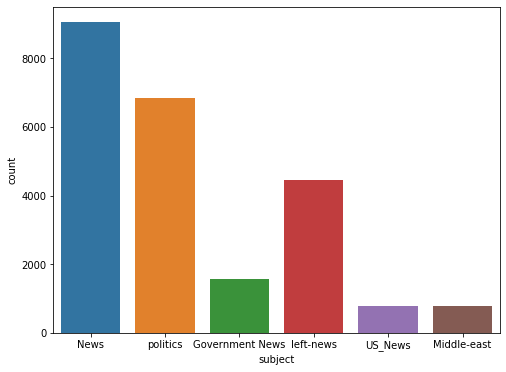

In [14]:
plt.figure(figsize=(8,6))
sns.countplot("subject", data=fake)
plt.show()

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saurabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

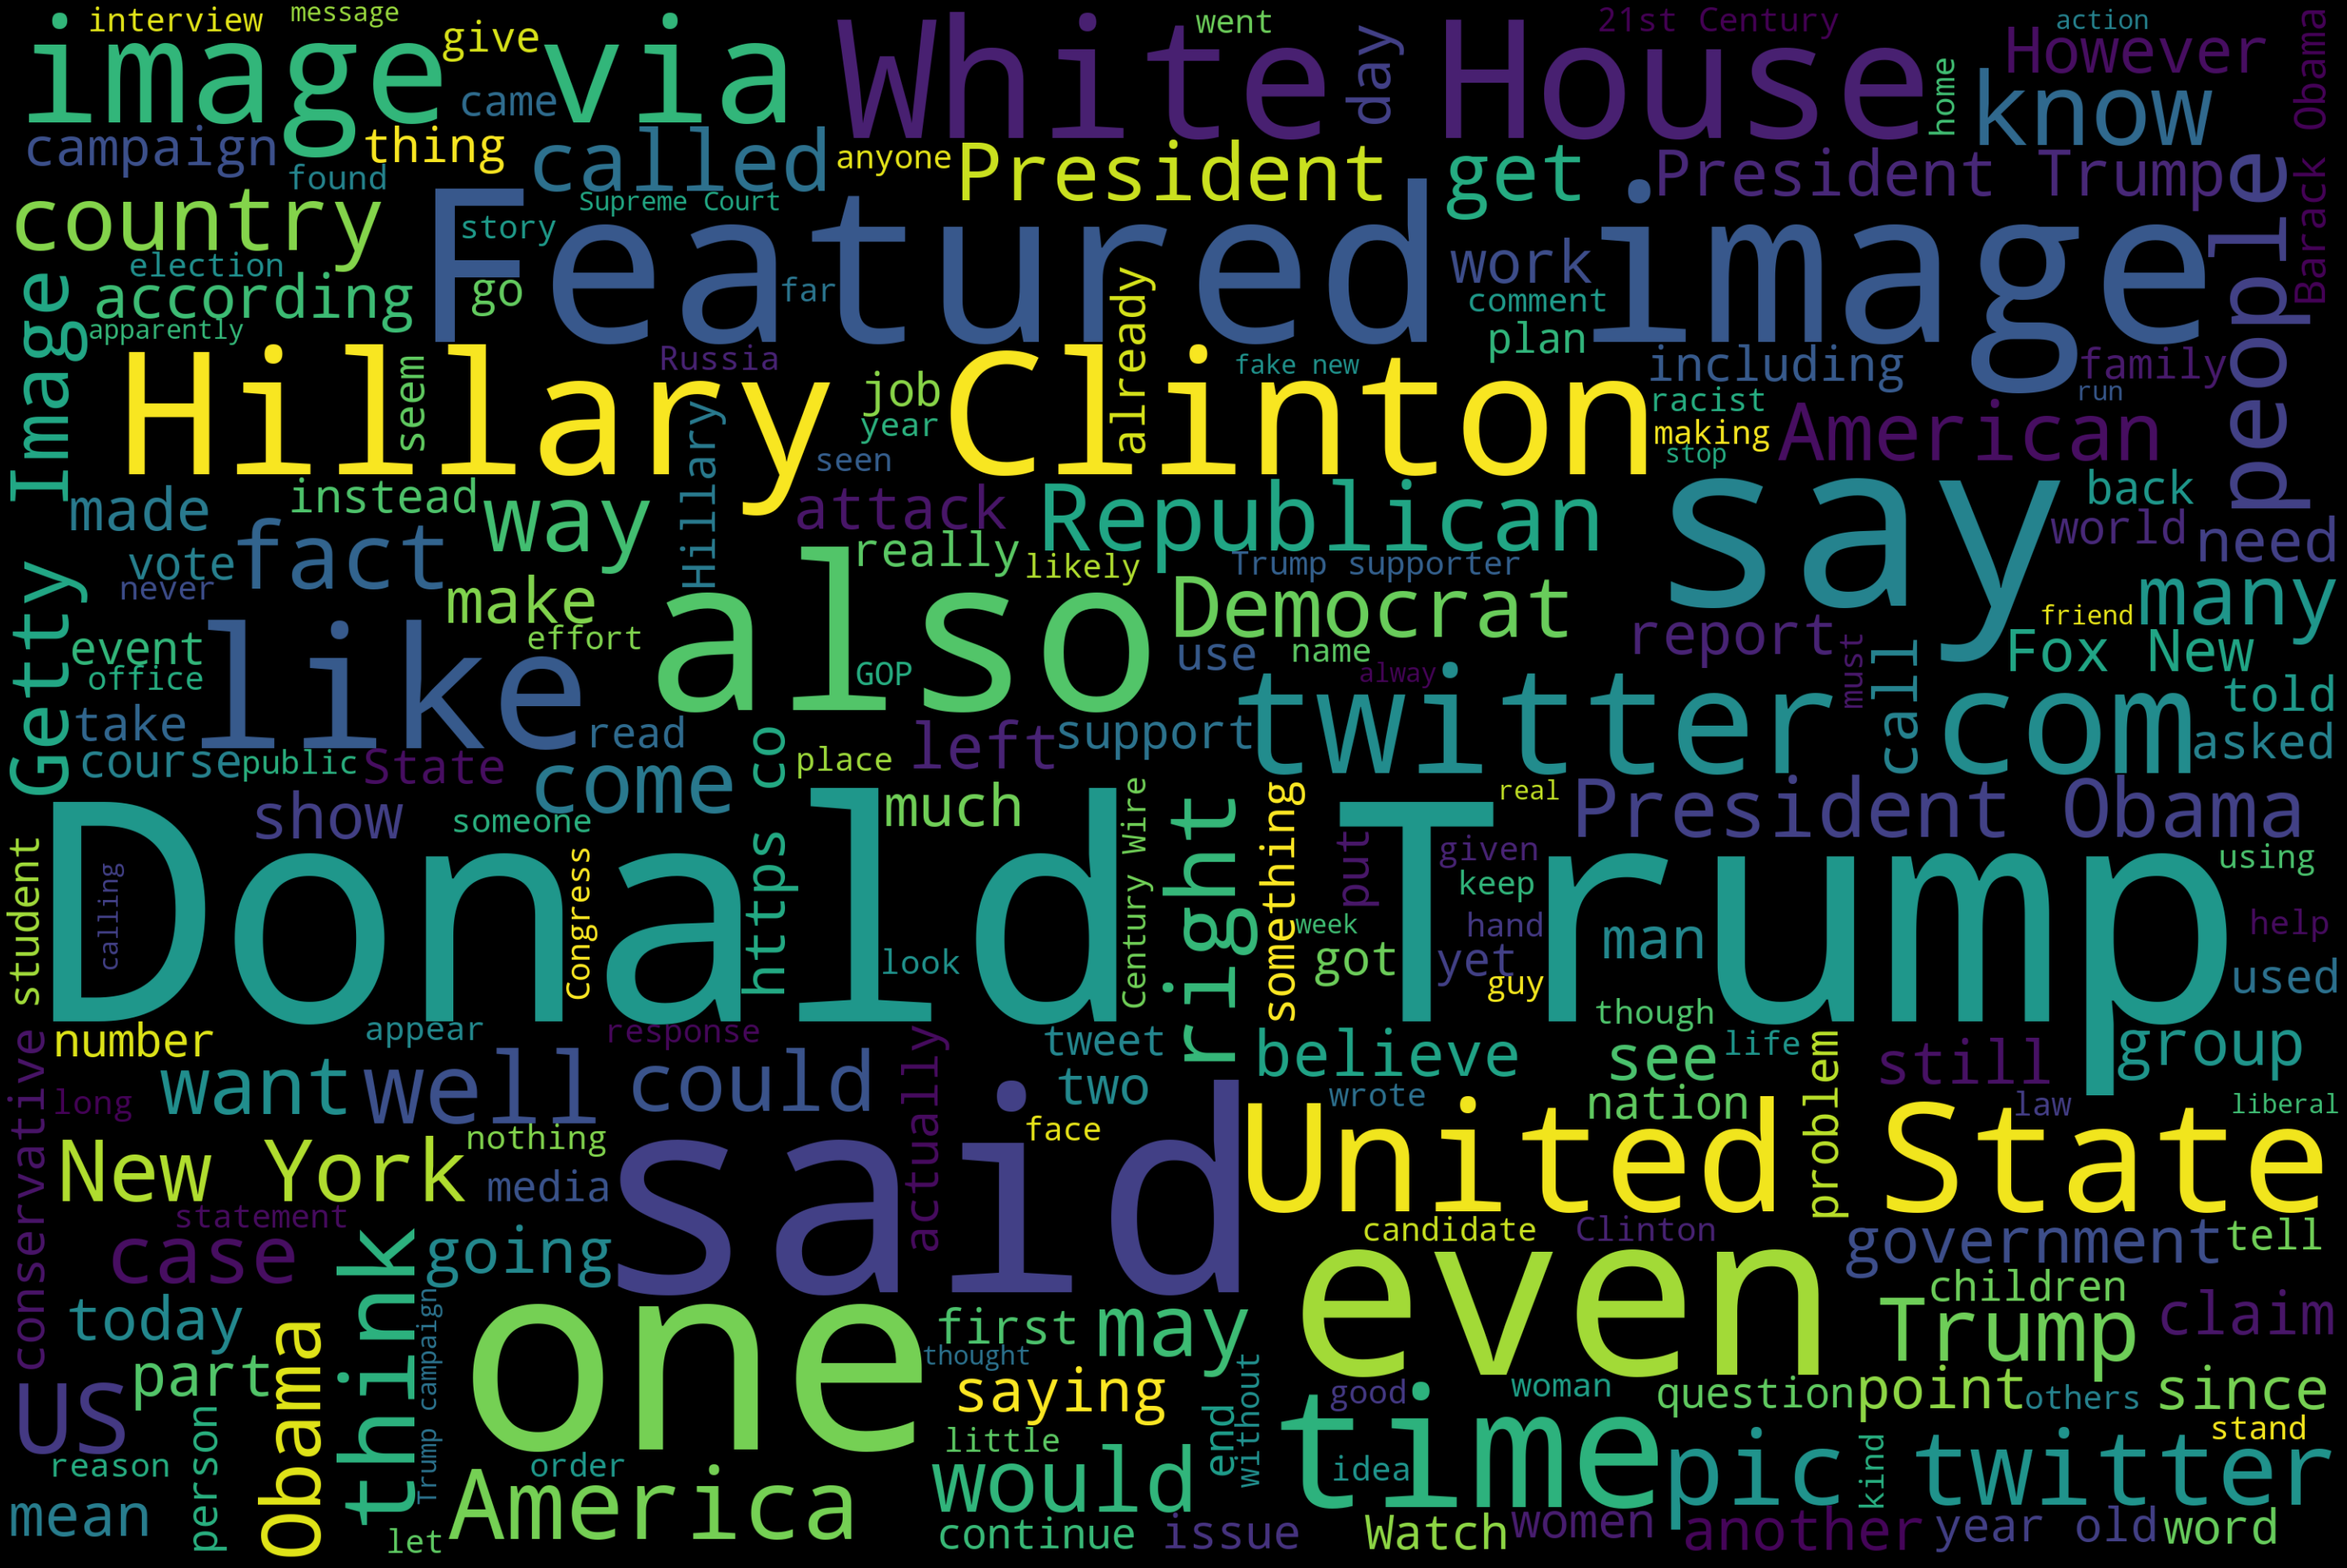

In [6]:
#Word Cloud
text = ''
for news in fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [7]:
unknown_publishers = []
for index,row in enumerate(true.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        record[1]
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [8]:
true.iloc[unknown_publishers].text

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [9]:
pub_info = []
news_text = []
for index,row in enumerate(true.text.values):
    if index in unknown_publishers:
        news_text.append(row)        
        pub_info.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    pub_info.append(record[0])
    news_text.append(record[1])

In [10]:
true["publisher"] = pub_info
true["news_text"] = news_text

del pub_info, news_text, record, unknown_publishers

In [11]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date                     publisher  \
0  December 31, 2017           WASHINGTON (Reuters)   
1  December 29, 2017           WASHINGTON (Reuters)   
2  December 31, 2017           WASHINGTON (Reuters)   
3  December 30, 2017           WASHINGTON (Reuters)   
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)   

                                           news_text  
0   The head of a conservative Republican faction...  
1   Transgender people will be allowed for the fi...  
2   The special counsel investigation of links be...  
3   Trump campaign adviser George Papadopoulos to...  
4   President Donald Trump called on the U.S. Pos...

In [12]:
true=true.drop(8970,axis=0)

In [13]:
# Checking for the same in fake news (Empty news)
fake_empty_index = [index for index,text in enumerate(fake.text.values) if str(text).strip() == '']
print("No of empty rows: {}".format({len(fake_empty_index)}))
fake.iloc[fake_empty_index].head()

No of empty rows: {630}


title text   subject  \
10923  TAKE OUR POLL: Who Do You Think President Trum...       politics   
11041  Joe Scarborough BERATES Mika Brzezinski Over “...       politics   
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...       politics   
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...       politics   
11236  SHOCKER: Public School Turns Computer Lab Into...       politics   

               date  
10923  May 10, 2017  
11041  Apr 26, 2017  
11190   Apr 6, 2017  
11225   Apr 2, 2017  
11236   Apr 1, 2017

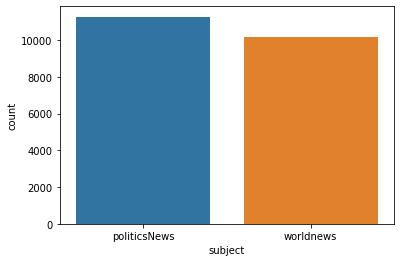

In [14]:
sns.countplot(x="subject", data=true)
plt.show()

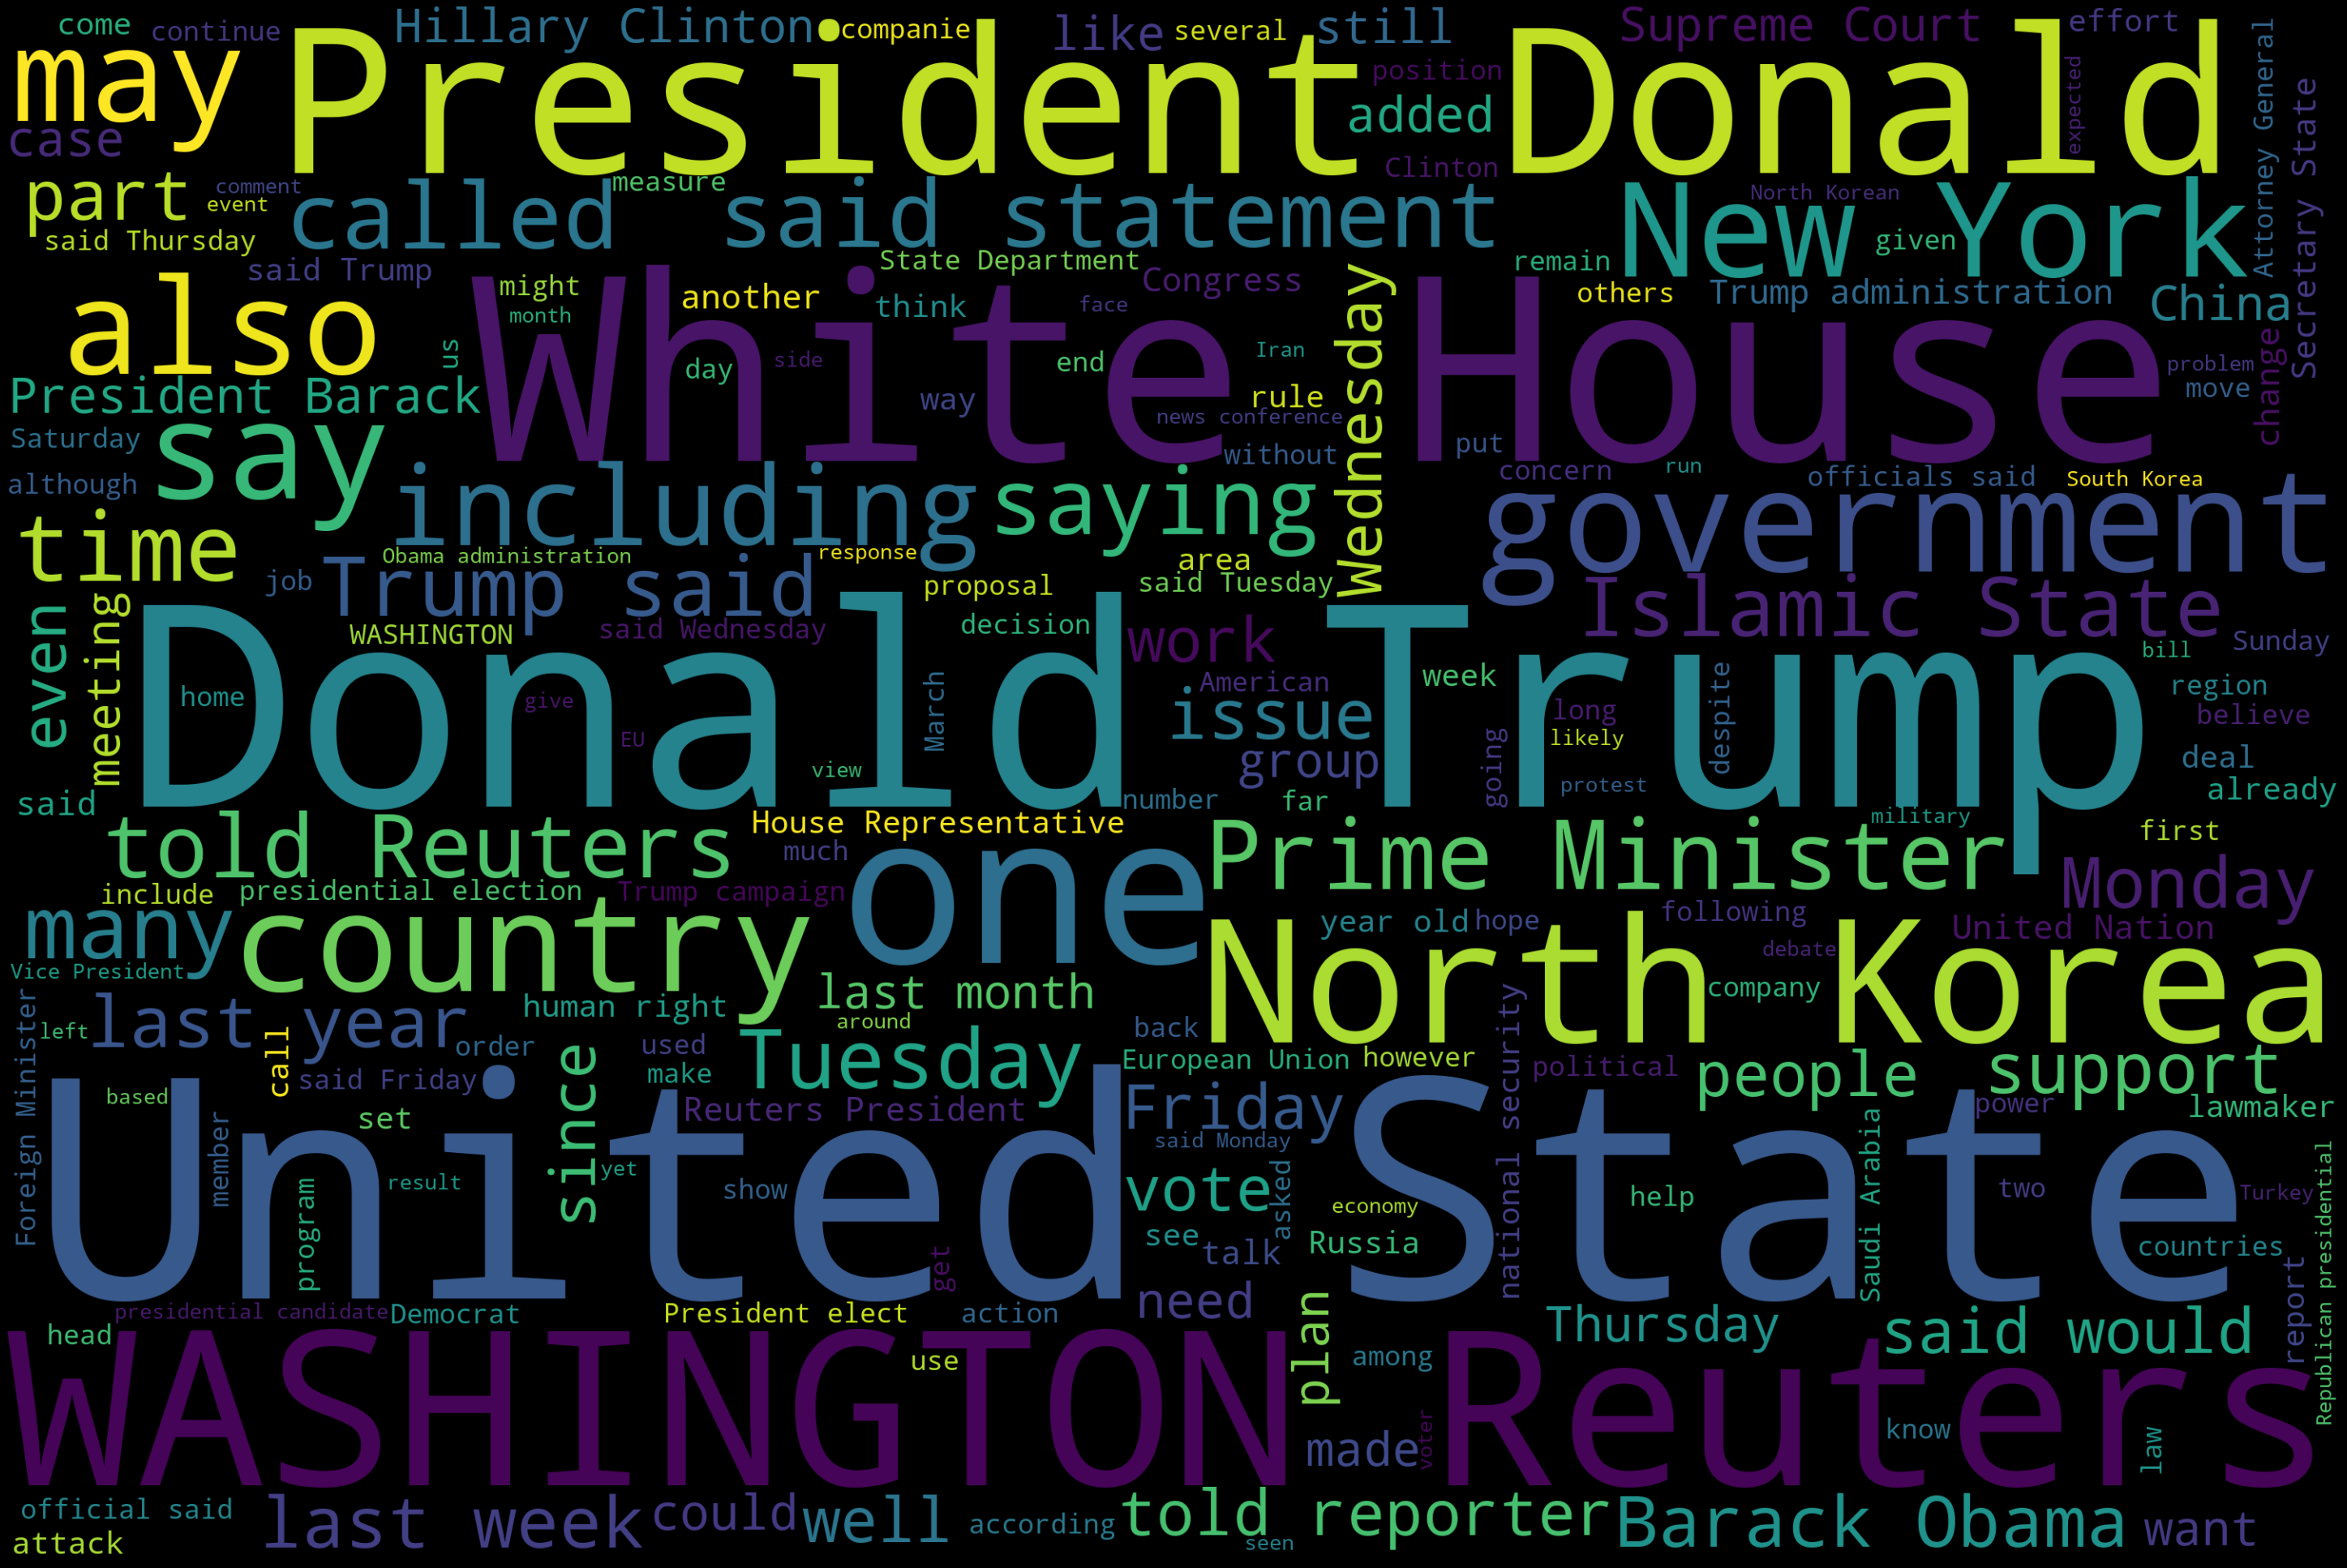

In [15]:
#WordCloud For Real News
text = ''
for news in true.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [16]:
# Adding class Information
true["class"] = 1
fake["class"] = 0

In [17]:
#Combining Title and Text
true["text"] = true["title"] + " " + true["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [18]:
# Subject is diffrent for real and fake thus dropping it
true = true.drop(["subject", "date","title",  "publisher"], axis=1)
fake = fake.drop(["subject", "date", "title"], axis=1)

In [19]:
#Combining both into new dataframe
data = true.append(fake, ignore_index=True)
del true, fake

In [20]:
y=data["class"].values

In [21]:
nltk.download('punkt')
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saurabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saurabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
nopunc = [char for char in news if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [24]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Joining the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Removing stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
X=data['text']
y=data['class']

In [36]:
cv=CountVectorizer()

In [37]:
X=cv.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

# Model Training 

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
nb=MultinomialNB()

In [42]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
predictions=nb.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
print(confusion_matrix(y_test,predictions))

[[6698  293]
 [ 310 6169]]


In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6991
           1       0.95      0.95      0.95      6479

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
from sklearn.pipeline import Pipeline

In [49]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),
])

In [50]:
X=data['text']
y=data['class']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [52]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [53]:
pred=pipeline.predict(X_test)

In [54]:
print(confusion_matrix(y_test,pred))

[[6693  298]
 [ 536 5943]]


In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6991
           1       0.95      0.92      0.93      6479

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



In [68]:
pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),
])

In [64]:
X = data['text']
y = data['class']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=111)

In [69]:
pipeline1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021E234D3BF8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [71]:
preds=pipeline1.predict(X_test)

In [72]:
print(confusion_matrix(y_test,preds))

[[6731  284]
 [ 140 6315]]


In [73]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7015
           1       0.96      0.98      0.97      6455

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470



In [1]:
from sklearn.svm import SVC

In [34]:
X = data['text']
y = data['class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
Tfidf_vect = TfidfVectorizer(max_features=5000)

In [42]:
Tfidf_vect.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [43]:
Train_X = Tfidf_vect.transform(X_train)

In [44]:
Test_X = Tfidf_vect.transform(X_test)

In [46]:
print(Tfidf_vect.vocabulary)

None


In [47]:
model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

In [49]:
model.fit(Train_X,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
predictions_SVM = model.predict(Test_X)

In [53]:
print(confusion_matrix(y_test,predictions_SVM))

[[6951   40]
 [  34 6445]]


In [55]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6991
           1       0.99      0.99      0.99      6479

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [59]:
print("accuracy:{}%".format(round(accuracy_score(y_test, predictions_SVM)*100,2)))

accuracy:99.45%
